In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.svm as SVR
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv("ETHUSD.csv",index_col=[0],parse_dates=[0],dayfirst = True)

In [3]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984
...,...,...,...,...,...
2023-06-14,1739.250122,1749.163208,1637.187744,1650.519287,7462905534
2023-06-15,1650.498169,1676.406616,1624.138306,1665.519775,7328564880
2023-06-16,1665.410645,1727.289551,1653.170898,1716.668823,6281023479


In [4]:
projection = 5

In [5]:
df["Prediction"] = df["Close"].shift(-projection)

In [6]:
df.tail(10)

,Open,High,Low,Close,Volume,Prediction
Date,,,,,,
2023-06-09,1846.077881,1854.824951,1828.544556,1840.225220,4610831509,1650.519287
2023-06-10,1840.391968,1844.785645,1721.443115,1752.384766,10788500406,1665.519775
2023-06-11,1752.527588,1776.847168,1741.110474,1753.415283,4559112981,1716.668823
2023-06-12,1753.075439,1757.659790,1722.906372,1742.528687,6031384958,1727.204102
2023-06-13,1742.390137,1761.955444,1727.749878,1739.037598,6214125203,1720.577515
2023-06-14,1739.250122,1749.163208,1637.187744,1650.519287,7462905534,NaN
2023-06-15,1650.498169,1676.406616,1624.138306,1665.519775,7328564880,NaN
2023-06-16,1665.410645,1727.289551,1653.170898,1716.668823,6281023479,NaN
2023-06-17,1716.671753,1766.763184,1714.150879,1727.204102,4875187477,NaN


In [7]:
x = np.array(df["Close"])
x = x[:-projection]

In [8]:
df.shape

(2048, 6)

In [9]:
print(x)
print(len(x))

[ 320.88400269  299.25299072  314.68099976 ... 1753.4152832  1742.52868652
 1739.03759766]
2043


In [10]:
y = np.array(df["Prediction"])
y = y[:-projection]

In [11]:
y

array([ 337.63101196,  333.35699463,  330.92401123, ..., 1716.66882324,
       1727.20410156, 1720.57751465])

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [13]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [14]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel="rbf",C=1e3,gamma = 0.00001)
svr_rbf.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000.0, gamma=1e-05)

In [15]:
svr_rbf_confidence = svr_rbf.score(x_test,y_test)

In [16]:
svr_rbf_confidence

0.973912995547029

In [17]:
svr_rbf_prediction = svr_rbf.predict(x_test)

In [18]:
svr_rbf_prediction

array([ 360.63952763,  320.74029216,  146.20965357,  118.55395394,
       2912.66475251,  195.8284331 ,  168.53635133,  180.69949097,
       1491.03092682,  339.25588569,  180.01741467,  270.73938939,
       4074.42373332,  611.07420908,  211.98459597,  109.15200388,
       2031.19499269, 1644.91876168,  164.95710092,  184.66011079,
        165.40518009,  778.32446986,  209.04183038,  235.32090371,
        327.03573162,  236.75133156, 1977.94223037, 2899.48741448,
       1705.46980903, 1103.35460794,  139.6891677 ,  197.3030332 ,
       1250.84971688,  111.40767649, 1331.83976104, 3175.81081856,
        464.66453293, 1540.09722808,  586.84571574, 1863.76136097,
       2775.15711157,  131.06999176,  157.80071   , 1819.56830733,
       4445.01796796,  124.40831462,  112.68145231,  185.66609967,
        758.71801372, 1877.92259876, 1343.45853703,  213.37008597,
        138.9214947 , 3356.30064319, 1799.80385436, 1872.24406128,
        184.66006341, 1160.25845466,  568.70113765,  179.35301

In [19]:
y_test

array([[ 286.49499512],
       [ 271.34100342],
       [ 135.85266113],
       [ 124.80648804],
       [3031.06713867],
       [ 203.727005  ],
       [ 158.21601868],
       [ 180.8266449 ],
       [1577.22045898],
       [ 389.87548828],
       [ 175.698349  ],
       [ 262.33172607],
       [3933.84448242],
       [ 538.22979736],
       [ 212.99157715],
       [ 101.26857758],
       [2226.11425781],
       [1843.53259277],
       [ 167.6234436 ],
       [ 185.99963379],
       [ 166.96984863],
       [ 719.38702393],
       [ 211.60012817],
       [ 262.19064331],
       [ 288.04598999],
       [ 227.13829041],
       [2088.57373047],
       [2763.70117188],
       [1957.24645996],
       [ 793.12200928],
       [ 140.68635559],
       [ 215.51620483],
       [1200.80859375],
       [  88.94530487],
       [1376.11547852],
       [3040.91650391],
       [ 459.94030762],
       [1327.68017578],
       [ 516.03601074],
       [1990.9708252 ],
       [2827.75610352],
       [ 110.010

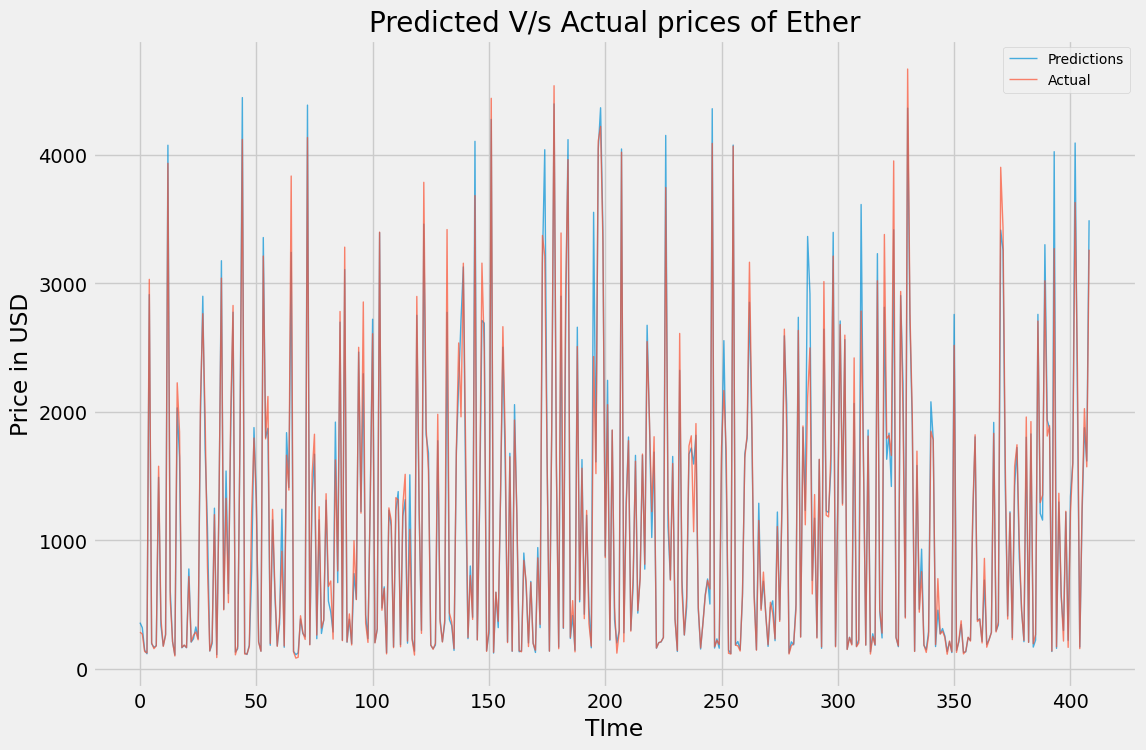

In [20]:
plt.figure(figsize=(12,8))
plt.plot(svr_rbf_prediction,label="Predictions",lw=1,alpha=0.7)
plt.plot(y_test,label="Actual",lw=1,alpha=0.7)
plt.legend(fontsize = 10)
plt.title("Predicted V/s Actual prices of Ether")
plt.xlabel("TIme")
plt.ylabel("Price in USD")
plt.show()